In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Import Dataset

In [2]:
bitcoin_data= pd.read_csv(r"C:\Users\Rajee\Downloads\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitcoin_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Search for Null Value

In [3]:
bitcoin_data.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

# Drop Null Value

In [4]:
bitcoin_data = bitcoin_data.dropna()
bitcoin_data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

# Convert TimeStamp to Date 

In [5]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Timestamp'],unit='s').dt.date
bitcoin_data

C:\Users\Rajee\AppData\Local\Temp/ipykernel_11464/357601736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Timestamp'],unit='s').dt.date


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30


# Merge Duplicate Data

In [6]:
grouped_data = bitcoin_data.groupby('Date', as_index = False).mean()
grouped_data

,Date,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,1.325342e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,1.325427e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,1.325535e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,1.325605e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,1.325682e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...,...,...
3371,2021-03-27,1.616846e+09,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
3372,2021-03-28,1.616933e+09,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
3373,2021-03-29,1.617019e+09,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819
3374,2021-03-30,1.617106e+09,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268


# Download Processed Data

In [7]:
grouped_data.to_csv (r'C:\Users\Rajee\Downloads\Preprocessed data.csv', index = False, header=True)

# Analysis (Percent Change)

In [8]:
#data=grouped_data['Date'][366]
#data

In [9]:

Analysis_2012= ((grouped_data['Close'][366]-grouped_data['Close'][1])/grouped_data['Close'][1])*100
Analysis_2013= ((grouped_data['Close'][731]-grouped_data['Close'][367])/grouped_data['Close'][367])*100
Analysis_2014= ((grouped_data['Close'][1096]-grouped_data['Close'][732])/grouped_data['Close'][732])*100
Analysis_2015= ((grouped_data['Close'][1458]-grouped_data['Close'][1097])/grouped_data['Close'][1097])*100
Analysis_2016= ((grouped_data['Close'][1824]-grouped_data['Close'][1459])/grouped_data['Close'][1459])*100
Analysis_2017= ((grouped_data['Close'][2189]-grouped_data['Close'][1825])/grouped_data['Close'][1825])*100
Analysis_2018= ((grouped_data['Close'][2554]-grouped_data['Close'][2190])/grouped_data['Close'][2190])*100
Analysis_2019= ((grouped_data['Close'][2919]-grouped_data['Close'][2555])/grouped_data['Close'][2555])*100
Analysis_2020= ((grouped_data['Close'][3285]-grouped_data['Close'][2920])/grouped_data['Close'][2920])*100

print("Percentage Change at the END of year: ")
print("2012: {}\n2013: {}\n2014: {}\n2015: {}\n2016: {}\n2017: {}\n2018: {}\n2019: {}\n2020: {}"
      .format((Analysis_2012),(Analysis_2013),(Analysis_2014),(Analysis_2015),
              (Analysis_2016),(Analysis_2017),(Analysis_2018),(Analysis_2019),(Analysis_2020)))

Percentage Change at the END of year: 
2012: 174.5511114443153
2013: 5473.723327582419
2014: -57.80246967837564
2015: 34.89100377414112
2016: 120.98705183482852
2017: 1258.8462848166325
2018: -72.01441275659218
2019: 94.51730334016428
2020: 301.4017223798988


# Dividing data (Training 95%, Testing 5%)

In [10]:
train_size = int(len(grouped_data) * 0.95)
test_size = len(grouped_data) - train_size
train = grouped_data.iloc[0:train_size, :]
test = grouped_data.iloc[train_size:len(grouped_data), :]
print("Train size: {}, Test size: {}". format(len(train), len(test)))
dataset = train.loc[:, ["Close"]].values # predict close value

Train size: 3207, Test size: 169


# Scaling Data

In [23]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(dataset)
data_scaled

array([[7.86163155e-06],
       [2.47576242e-05],
       [3.48344116e-05],
       ...,
       [5.91874973e-01],
       [5.96403514e-01],
       [5.96541675e-01]])

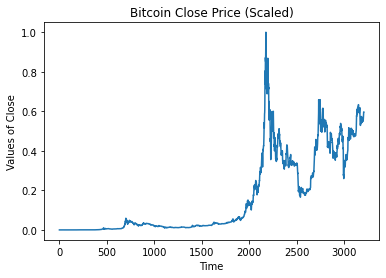

In [12]:
plt.plot(data_scaled)
plt.xlabel("Time")
plt.ylabel("Values of Close")
plt.title("Bitcoin Close Price (Scaled)")
plt.show()

# Dividing data (Training 50%, Testing 50%)

In [13]:
train_size = int(len(data_scaled) * 0.50)
test_size = len(data_scaled) - train_size
data_scaled_train = data_scaled[0:train_size, :]
data_scaled_test = data_scaled[train_size:len(data_scaled), :]

In [14]:
time_step = 10
dataX = []
dataY = []
for i in range(len(data_scaled_train) - time_step - 1):
    a = data_scaled_train[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_train[i + time_step, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

print("trainX shape: {}\ntrainY shape: {}". format(trainX.shape, trainY.shape))

trainX shape: (1592, 10)
trainY shape: (1592,)


In [15]:
dataX = []
dataY = []
for i in range(len(data_scaled_test) - time_step -1):
    a = data_scaled_test[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_test[i + time_step, 0])
testX = np.array(dataX)
testY = np.array(dataY)

print("testX shape: {}\ntestY shape: {}". format(testX.shape, testY.shape))

testX shape: (1593, 10)
testY shape: (1593,)


In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print("X_train shape: ",trainX.shape)
print("X_test shape: ",testX.shape)

X_train shape:  (1592, 1, 10)
X_test shape:  (1593, 1, 10)


# Modelling

In [17]:
model = Sequential()
model.add(LSTM(256, input_shape = (1, time_step))) 
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer = "adam")
model.fit(trainX, trainY, epochs=80, batch_size=64)

Epoch 1/80
25/25 [==============================] - 3s 7ms/step - loss: 7.6781e-05
Epoch 2/80
25/25 [==============================] - 0s 6ms/step - loss: 5.5935e-06
Epoch 3/80
25/25 [==============================] - 0s 6ms/step - loss: 4.2693e-06
Epoch 4/80
25/25 [==============================] - 0s 6ms/step - loss: 3.7068e-06
Epoch 5/80
25/25 [==============================] - 0s 6ms/step - loss: 3.9551e-06
Epoch 6/80
25/25 [==============================] - 0s 6ms/step - loss: 3.5317e-06
Epoch 7/80
25/25 [==============================] - 0s 6ms/step - loss: 3.5608e-06
Epoch 8/80
25/25 [==============================] - 0s 6ms/step - loss: 3.4310e-06
Epoch 9/80
25/25 [==============================] - 0s 6ms/step - loss: 3.6354e-06
Epoch 10/80
25/25 [==============================] - 0s 6ms/step - loss: 3.4661e-06
Epoch 11/80
25/25 [==============================] - 0s 6ms/step - loss: 3.2059e-06
Epoch 12/80
25/25 [==============================] - 0s 6ms/step - loss: 2.9922e-06
E

# Prediction

In [25]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

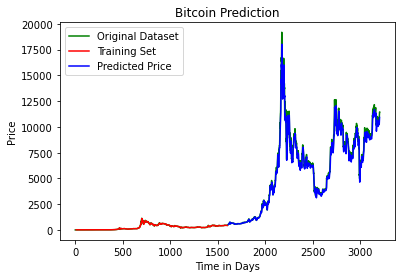

In [26]:
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = testPredict
# plot
plt.plot(scaler.inverse_transform(data_scaled),'g',label='Original Dataset')
plt.plot(trainPredictPlot,'r',label='Training Set')
plt.plot(testPredictPlot,'b',label='Predicted Price')
plt.legend(loc='upper left')
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.title("Bitcoin Prediction")
plt.show()